In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The goal is to predict the survival or death of a given passenger based on a set of variables
describing him such as his age, sex, or his passenger class on boat.

Problem Statement: What is the probability that a new passenger that went on that ship Survived or not, we have to predict whether that person survived or not

In [1]:
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('train.csv')
# Display all the columns
pd.set_option('display.max_columns', None)
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# raw_data = pd.concat([train, test], axis=0).reset_index(drop=True)
# raw_data = pd.DataFrame(raw_data)
# raw_data.head()

In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dealing with Datatypes of Numerical Values

In [6]:
data = []
def numeric_columns(dataframe):
    for col in dataframe.columns:
        # grab only the numerical variables except passengerId
        if dataframe[col].dtypes != 'object':
            if col != 'PassengerId':
                data.append(col)
                print(dataframe[col])
    return

numeric_columns(train)

print('Data types that are either intergers or float :\n', data)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
Data types that are either intergers or float :
 ['Survived', 'Pclas

In [7]:
# keep only the numerical features, so we can treat the presence of outliers as outliers are only
# present in numerical features
numeric_features = train[data]
numeric_features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Treatment of Outliers

In [8]:
def detect_outliers(dataframe, n):
    outlier_indices = []
    # Check for outliers in the numerical features
    for col in dataframe:
        # 1st quartile 10%
        Q1 = np.percentile(dataframe[col], 10)
        # 3rd quartile 90%
        Q3 = np.percentile(dataframe[col], 90)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list = dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index
        # Append the found outlier indices of each column to the list of outlier indices
        outlier_indices.extend(outlier_list)
    # Select observations with respect to the number of outliers
    outlier_indices = Counter(outlier_indices)
    # n is the number of times outliers occurs in the columns
    multiple_outliers = [outlier for outlier,num_observed in outlier_indices.items() if num_observed > n]
    return multiple_outliers

# remove outliers that occurs more than two times in the numeric columns
outliers_to_drop = detect_outliers(numeric_features, 1)

It can be seen below that passenger 27, 88 and 341 has high ticket

In [9]:
# Show the outliers
train.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S


In [10]:
# Drop outliers from the training set
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
train_size = len(train)
train.shape

(888, 12)

In [11]:
# Summary and Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,446.989865,0.382883,2.313063,29.731603,0.514640,0.376126,31.424492
std,257.101463,0.486364,0.834007,14.547835,1.095141,0.801896,47.927261
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the number of the passengers in the Sex and Pclass

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


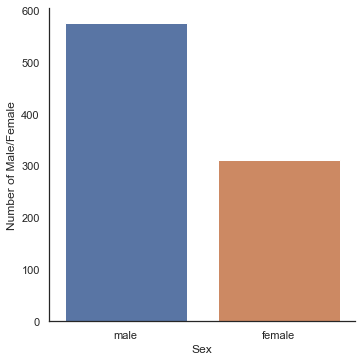

In [12]:
# We want to know how many female and male(Gender) are they on the ship
c = sns.factorplot(x='Sex', data=train, kind='count')
c = c.set_ylabels('Number of Male/Female')

From the plot above the Male passengers are more than the Female

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


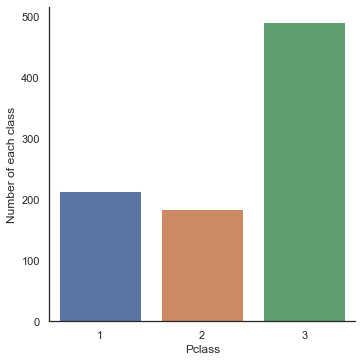

In [13]:
# We want to know how many passengers are they in a class
c = sns.factorplot(x='Pclass', data=train, kind='count')
c = c.set_ylabels('Number of each class')

It makes sense that 3rd class which is the lower class has the highest number of passengers. My hypothesis is that the 3rd class is the cheapest.

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


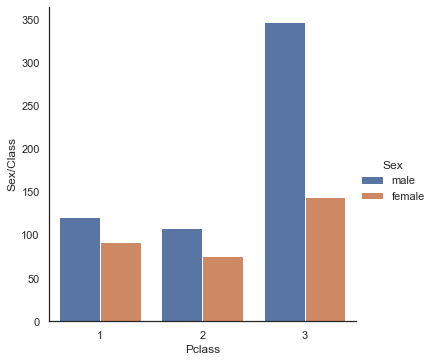

In [14]:
# We want to know the number of Male and Female(Sex) amongs each class(Pclass)
c = sns.factorplot(x='Pclass', hue='Sex', data=train, kind='count')
c = c.set_ylabels('Sex/Class')

It shows that Male in the 3rd class has the highest number of passengers than the Female

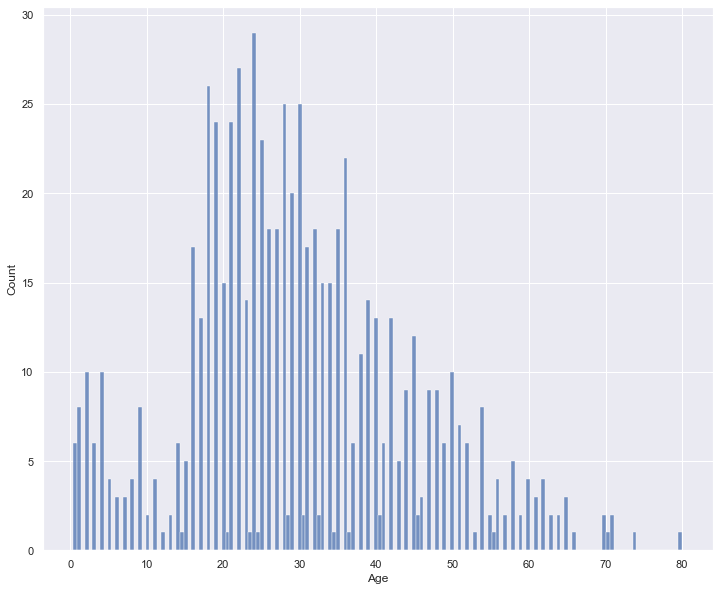

In [15]:
c = sns.set(rc={'figure.figsize':(12,10)})
c = sns.histplot(x='Age', data=train, bins=160)

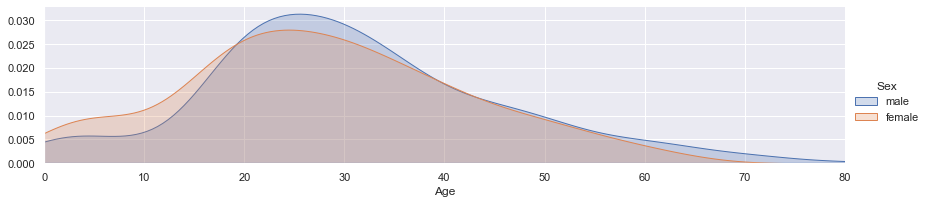

In [16]:
# Data distribution of the age among their Gender
# Create the background
c = sns.FacetGrid(hue='Sex', data=train, aspect=4)
# map to your desired plot
c.map(sns.kdeplot, 'Age', shade=True)
oldest_person = train['Age'].max()
c.set(xlim = (0, oldest_person))
c = c.add_legend()

This shows that Females are younger than Males

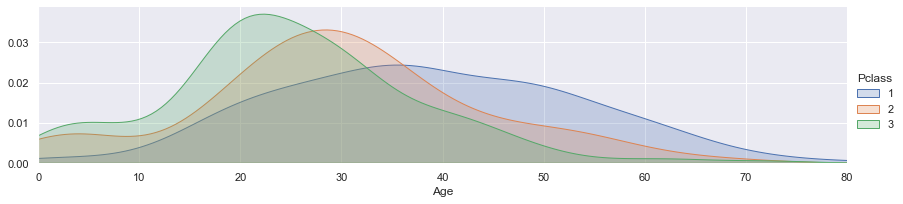

In [18]:
# Data distribution of the age among the class
c = sns.FacetGrid(hue='Pclass', data=train, aspect=4)
# map to your desired plot
c.map(sns.kdeplot, 'Age', shade=True)
oldest_person = train['Age'].max()
c.set(xlim = (0, oldest_person))
c = c.add_legend()

The 3rd class is the youngest, followed by 2nd class and then 1st class

# Feature Analysis

### Numerical Variables

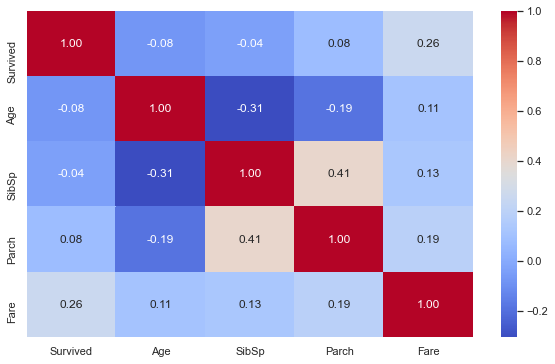

In [17]:
# Correlation matrix between numerical values
g = train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(10,6))
g = sns.heatmap(g, annot=True, fmt='.2f',cmap='coolwarm')

Only Fare(0.26) feature seems to have a significative correlation with the target(Survival probability) feature.
It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore these features in detail

c:\program files\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


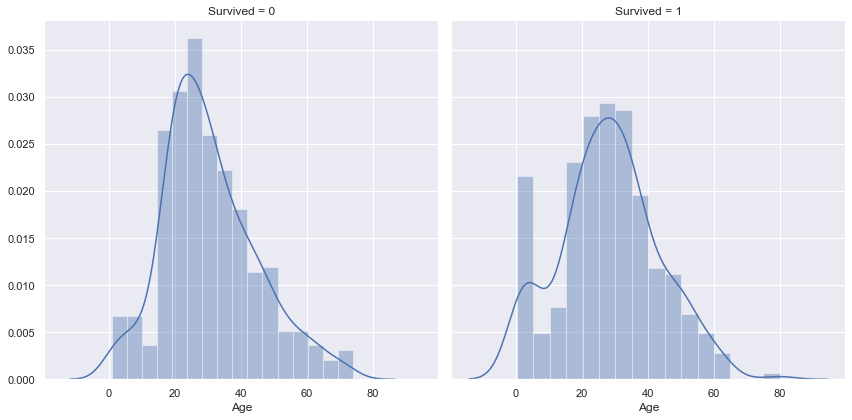

In [18]:
# Explore Age vs Survived
g = sns.FacetGrid(col='Survived', data=train, size=6)
g = g.map(sns.distplot, 'Age')

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

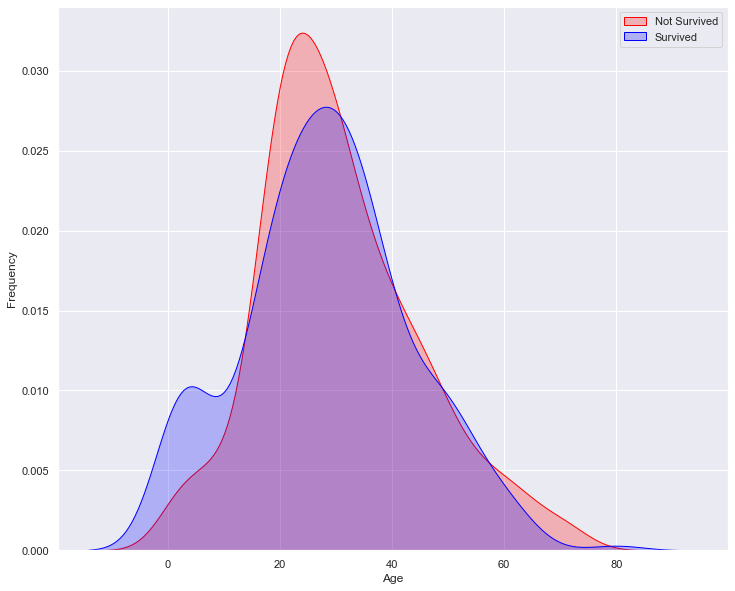

In [19]:
# Explore the Age distribution
g = sns.kdeplot(train['Age'][(train['Survived'] == 0) & (train['Age'].notnull())], 
                color='Red', shade=True)
g = sns.kdeplot(train['Age'][(train['Survived'] == 1) & (train['Age'].notnull())],
                color='Blue', shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

When we superimpose the two densities, we cleary see a peak correponsing (between 0 and 5) to babies and very young children that Survived.

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


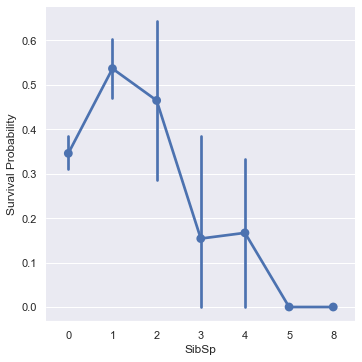

In [20]:
# SibSp feature vs Survived
g = sns.factorplot(x='SibSp', y='Survived', data=train)
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

It seems that passengers having a lot of siblings/spouses has less chance of Survival, while single passengers (SibSp 0) with two other persons(SibSp 1 or SibSp 2) has more chance to survive

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


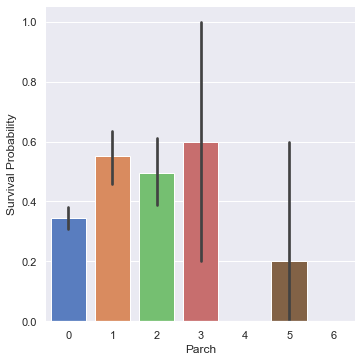

In [21]:
# Parch feature vs Survived
g = sns.factorplot(x='Parch', y='Survived', data=train, kind='bar', size=5, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

It shows that large families has less chance to survive, while small families such i.e Parch 1,2 & 3 has higher chances at survival more than the single Parch 0

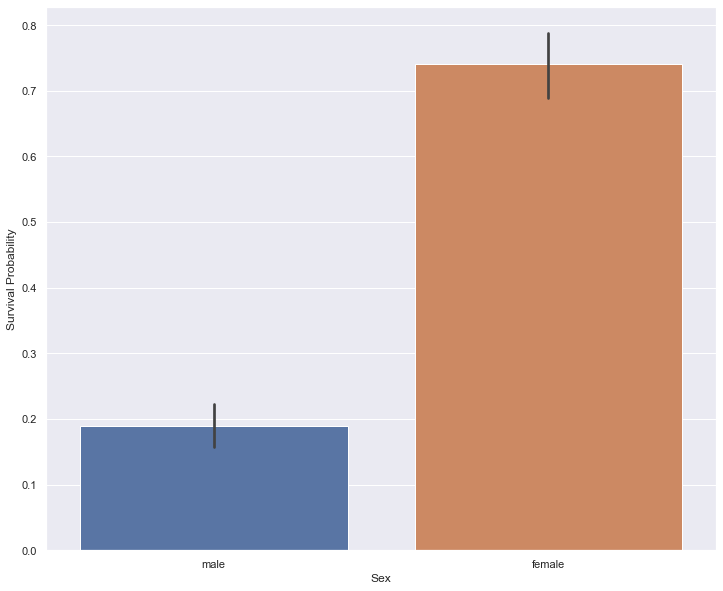

In [22]:
g = sns.barplot(x='Sex', y='Survived', data=train)
g = g.set_ylabel('Survival Probability')

In [23]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.740385
male,0.189236


It is clearly obvious that Female has higher chance of survival than male. Therefore, Sex plays an important role in the prediction of survival

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


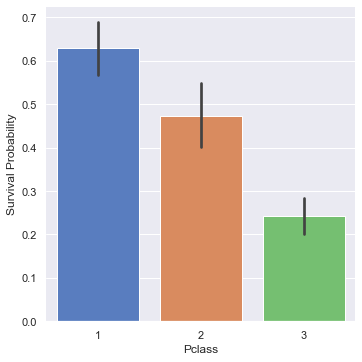

In [24]:
# Pclass vs Survived
g = sns.factorplot(x='Pclass', y='Survived', data=train, kind='bar', size=5, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

it shows that 1st class passengers at the top has higher probability to survive than the 2nd class and there is more chances of survival in the 2nd class than the 3rd class

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


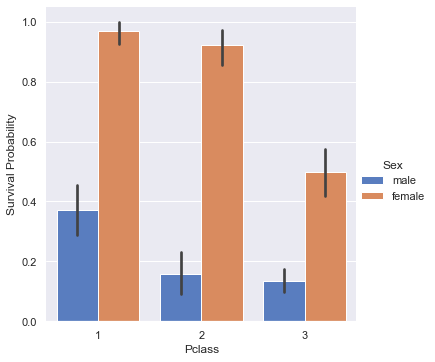

In [25]:
# Pclass vs Survived vs Sex
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train, size=5, kind='bar', palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

First class passengers have more chance to survive than second class and third class passengers.

Since we have two missing values , i decided to fill them with the most fequent value of "Embarked" (S)

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


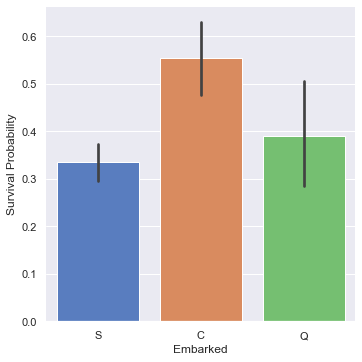

In [26]:
# Embarked vs Survived
g = sns.factorplot(x='Embarked', y='Survived', data=train, kind='bar', size=5, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

It seems that passenger coming from Cherbourg (C) have more chance to survive.

My hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


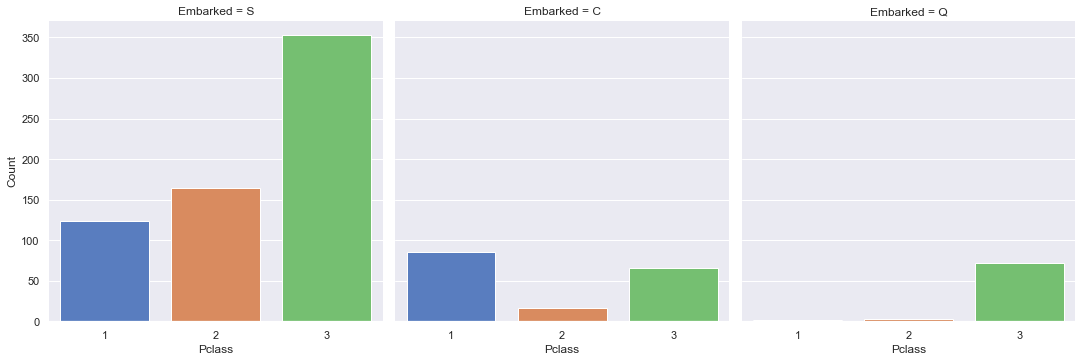

In [27]:
# Pclass vs Embarked
g = sns.factorplot(x='Pclass', col='Embarked', data=train, kind='count', size=5, palette='muted')
g.despine(left=True)
g = g.set_ylabels('Count')

Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.

# Check for Null and missing values

### Dealing with Missing Values

In [28]:
# We need to know the number of children in each class
def children(passenger):
    age, sex = passenger
    if age <= 17:
        # return child else sex(male or female)
        return 'Child'
    else:
        return sex

# Now we have three categories 'Child', 'Male' and 'Female'
train['Person'] = train[['Age', 'Sex']].apply(children, axis=1)

In [29]:
train.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


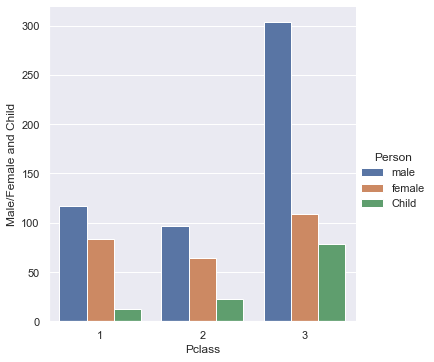

In [30]:
# Now let us check the ratio of male, female and children in the category of class
c = sns.factorplot(x='Pclass', hue='Person', data=train, kind='count')
c = c.set_ylabels('Male/Female and Child')

They are more children in the 3rd class than in other class

### Categorical Variables

In [31]:
#Grab the title in their Names 
train['Name'][9].split('.')[0].split(', ')[1]

'Mrs'

In [32]:
# Create a feature to estimate the age
train['Title'] = train['Name'].apply(lambda name: name.split('.')[0].split(', ')[1])

c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

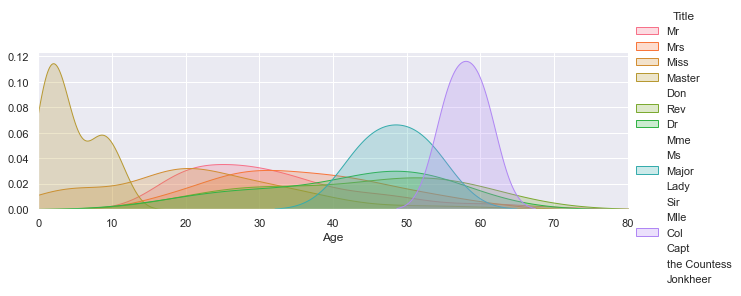

In [33]:
c = sns.FacetGrid(hue='Title', data=train, aspect=3)
# map to your desired plot
c.map(sns.kdeplot, 'Age', shade=True)
oldest_person = train['Age'].max()
c.set(xlim = (0, oldest_person))
c = c.add_legend()

In [34]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Miss


In [35]:
# We need to seperate the children from the adults and then find their median with respect to their age
# input it as missing values and then merge them back as a one dataset again.
young = []
def get_young(age):
    for i in age:
        if i <= 17:
            young.append(i)
    return young
matured = []
def get_matured(age):
    for i in age:
        if i > 17:
            matured.append(i)
    return matured

Master are the underage male(including babies) including Miss which are below 17 years of age

#### Note: When Outliers are present in your dataset use Median otherwise use Mean

In [36]:
young = get_young(train['Age'])
young_median_value = np.median(young)
print('Mean Age of Young persons: ',young_median_value)
print('A list of Young persons: ',young)

Mean Age of Young persons:  9.0
A list of Young persons:  [2.0, 14.0, 4.0, 14.0, 2.0, 15.0, 8.0, 14.0, 3.0, 7.0, 5.0, 11.0, 4.0, 17.0, 16.0, 0.83, 17.0, 16.0, 14.5, 17.0, 2.0, 12.0, 16.0, 9.0, 16.0, 17.0, 1.0, 9.0, 4.0, 1.0, 9.0, 1.0, 4.0, 3.0, 2.0, 16.0, 16.0, 5.0, 8.0, 3.0, 16.0, 7.0, 16.0, 2.0, 0.92, 17.0, 16.0, 16.0, 2.0, 3.0, 15.0, 3.0, 1.0, 1.0, 17.0, 3.0, 10.0, 17.0, 14.0, 4.0, 13.0, 5.0, 0.75, 2.0, 9.0, 9.0, 17.0, 16.0, 2.0, 17.0, 7.0, 9.0, 11.0, 8.0, 17.0, 16.0, 4.0, 9.0, 2.0, 0.75, 14.0, 14.0, 15.0, 4.0, 6.0, 17.0, 11.0, 16.0, 4.0, 6.0, 0.67, 16.0, 5.0, 13.0, 17.0, 8.0, 1.0, 16.0, 11.0, 0.42, 6.0, 10.0, 2.0, 1.0, 15.0, 0.83, 16.0, 17.0, 4.0, 9.0, 16.0, 4.0, 15.0]


In [37]:
adult = get_matured(train['Age'])
matured_median_value = np.median(adult)
print('Mean Age of Adults: ',matured_median_value)
print('A list of Adults: ',adult)

Mean Age of Adults:  31.0
A list of Adults:  [22.0, 38.0, 26.0, 35.0, 35.0, 54.0, 27.0, 58.0, 20.0, 39.0, 55.0, 31.0, 35.0, 34.0, 28.0, 38.0, 40.0, 66.0, 28.0, 42.0, 21.0, 18.0, 40.0, 27.0, 19.0, 18.0, 21.0, 49.0, 29.0, 65.0, 21.0, 28.5, 22.0, 38.0, 45.0, 29.0, 19.0, 26.0, 32.0, 21.0, 26.0, 32.0, 25.0, 30.0, 22.0, 29.0, 28.0, 33.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, 71.0, 23.0, 34.0, 34.0, 28.0, 21.0, 33.0, 37.0, 28.0, 21.0, 38.0, 47.0, 22.0, 20.0, 21.0, 70.5, 29.0, 24.0, 21.0, 32.5, 32.5, 54.0, 24.0, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 24.0, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, 51.0, 30.0, 44.0, 40.0, 26.0, 45.0, 28.0, 61.0, 21.0, 56.0, 18.0, 50.0, 30.0, 36.0, 45.0, 40.0, 36.0, 32.0, 19.0, 19.0, 44.0, 58.0, 42.0, 24.0, 28.0, 34.0, 45.5, 18.0, 32.0, 26.0, 40.0, 24.0, 35.0, 22.0, 30.0, 31.0, 27.0, 42.0, 32.0, 30.0, 27.0, 51.0, 38.0, 22.0, 19.0, 20.5, 18.0, 35.0, 29.0, 59.0, 24.0, 44.0, 19.0, 33.0, 29.0, 22.0, 30.0, 44.0, 25.0, 24.0, 

In [38]:
# Here is a dataframe of the young persons, with these titles Master and Miss
group_young = train.groupby(train['Person'])
new_young = group_young.get_group('Child').reset_index(drop=True)
new_young.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,Master
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,Mrs
2,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child,Miss
3,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Child,Miss
4,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Child,Master


In [39]:
# This is a dataframe of the Adults
adults = train[train['Person'] != 'Child']
adults.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Mr


In [40]:
# Copy them into a new variable so as not to affect the original data
new_young = new_young.copy()
adults = adults.copy()

In [41]:
# Check for missing values in the young persons data
# No missing values in the young persons dataframe
new_young.isnull().sum().sort_values(ascending=False)

Cabin          94
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Person          0
Title           0
dtype: int64

In [42]:
# Check for missing values in the adult dataframe
adults.isnull().sum().sort_values(ascending=False)

Cabin          593
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Person           0
Title            0
dtype: int64

In [43]:
# So let's check the adults age to see if there is any young person present
for i in adults['Age']:
    if i <= 17:
        print('Young present {}'.format(i))
    else:
        print('No young')

No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
No young
N

In [44]:
# Now lets fill the missing values of their age with their respective median.
adults['Age'] = adults['Age'].fillna(matured_median_value)

In [45]:
# As you can see no more missing values in age anymore
adults.isnull().sum().sort_values(ascending=False)

Cabin          593
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Person           0
Title            0
dtype: int64

In [46]:
new_young.shape

(113, 14)

In [47]:
adults.shape

(775, 14)

In [48]:
# Let's merge both data of young and adults as a whole dataset once again
raw_data = pd.concat([new_young, adults], axis=0)
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,Master
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,Mrs
2,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child,Miss
3,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Child,Miss
4,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Child,Master


In [49]:
raw_data.shape

(888, 14)

In [50]:
raw_data['Embarked'].value_counts()

S    641
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
# Use mode to get the most frequent value which is 'S'
raw_data['Embarked'].mode()

0    S
dtype: object

In [52]:
raw_data['Embarked'] = raw_data['Embarked'].fillna('S')

In [53]:
raw_data.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Person           0
Title            0
dtype: int64

In [54]:
# Drop the Cabin columns as they are many null values and this does not help in making predictions
raw_data.drop(['Cabin'], axis=1, inplace=True)

'Fare' has a Skewness of 5.024780718746511


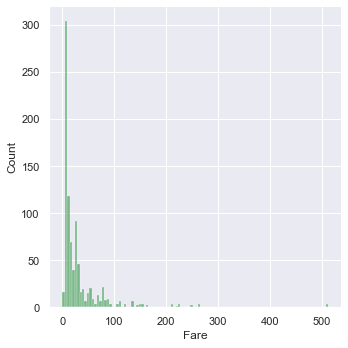

In [55]:
# Explore the Fare distribution
g = sns.displot(raw_data['Fare'], color = 'g', legend=True)
print("'Fare' has a Skewness of {}".format(raw_data['Fare'].skew()))

As we can see, this can lead to overweight very high values in the model even if it is scaled.
In this case it is better to transform it with the log function to reduce the skew

Reduced Skewness of 'Fare' to 0.4196486420694253


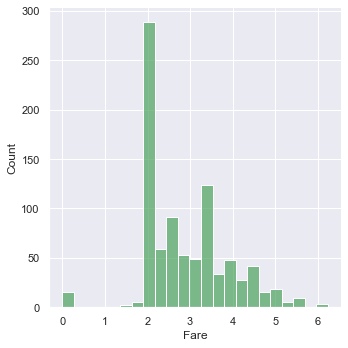

In [56]:
# Apply log to Fare to reduce skewness
raw_data['Fare'] = raw_data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
print("Reduced Skewness of 'Fare' to {}".format(raw_data['Fare'].skew()))
g = sns.displot(raw_data['Fare'], color = 'g', legend=True)

In [57]:
cat_data = []
def _columns(dataframe):
    for col in dataframe.columns:
        # grab every categories except the Name column
        if dataframe[col].dtypes == 'object':
            if col != 'Name': 
                cat_data.append(col)
                print(dataframe[col])
    return

_columns(raw_data)

print('Category Variables :\n', cat_data)

0        male
1      female
2      female
3      female
4        male
        ...  
883      male
884    female
885    female
886      male
887      male
Name: Sex, Length: 888, dtype: object
0          349909
1          237736
2         PP 9549
3          350406
4          382652
          ...    
883        211536
884        112053
885    W./C. 6607
886        111369
887        370376
Name: Ticket, Length: 888, dtype: object
0      S
1      C
2      S
3      S
4      Q
      ..
883    S
884    S
885    S
886    C
887    Q
Name: Embarked, Length: 888, dtype: object
0       Child
1       Child
2       Child
3       Child
4       Child
        ...  
883      male
884    female
885    female
886      male
887      male
Name: Person, Length: 888, dtype: object
0      Master
1         Mrs
2        Miss
3        Miss
4      Master
        ...  
883       Rev
884      Miss
885      Miss
886        Mr
887        Mr
Name: Title, Length: 888, dtype: object
Category Variables :
 ['Sex', 'Ticket'

In [58]:
cat_features = raw_data[cat_data]
cat_features.insert(1, 'Pclass', raw_data['Pclass'])
cat_features.head()

,Sex,Pclass,Ticket,Embarked,Person,Title
0,male,3,349909,S,Child,Master
1,female,2,237736,C,Child,Mrs
2,female,3,PP 9549,S,Child,Miss
3,female,3,350406,S,Child,Miss
4,male,3,382652,Q,Child,Master


In [59]:
# Let's check to see who are with family and who are alone
raw_data['Alone'] = raw_data['SibSp'] + raw_data['Parch']
raw_data['Alone'].head()

0    4
1    1
2    2
3    0
4    5
Name: Alone, dtype: int64

In [60]:
raw_data['Alone'].loc[raw_data['Alone'] > 0] = 'With Family'
raw_data['Alone'].loc[raw_data['Alone'] == 0] = 'Without Family'

c:\program files\python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


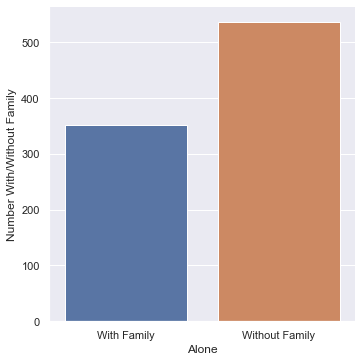

In [61]:
g = sns.factorplot(x='Alone', data=raw_data, kind='count')
g = g.set_ylabels('Number With/Without Family')

The number of passengers that went without any Family are more than the ones that went with their Families.

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


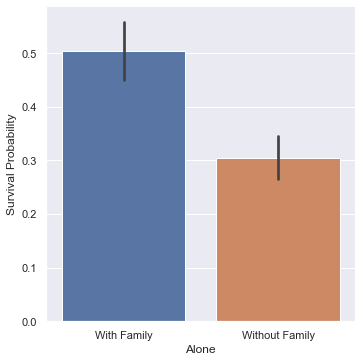

In [64]:
g = sns.factorplot(x='Alone', y='Survived', data=raw_data, kind='bar')
g = g.set_ylabels('Survival Probability')

It is interesting to know that passengers with Families has more chances of survival than the ones without Familes. My hypothesis passengers without Families helps those with Familes to evacuate the ship

c:\program files\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


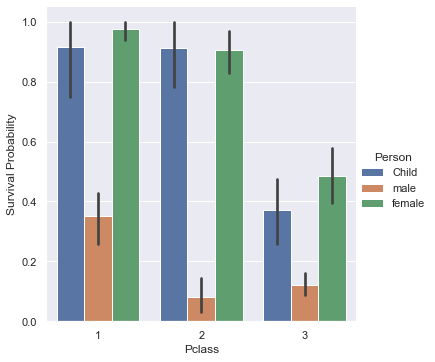

In [62]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Person', data=raw_data, kind='bar')
g = g.set_ylabels('Survival Probability')

Women had higher chances of survival than the Children in the 1st class and the survial rate is less for the 3rd class

# Feature Engineering

In [63]:
# We are trying to onehot encode the title feature
raw_data['Title'].unique()

array(['Master', 'Mrs', 'Miss', 'Mr', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

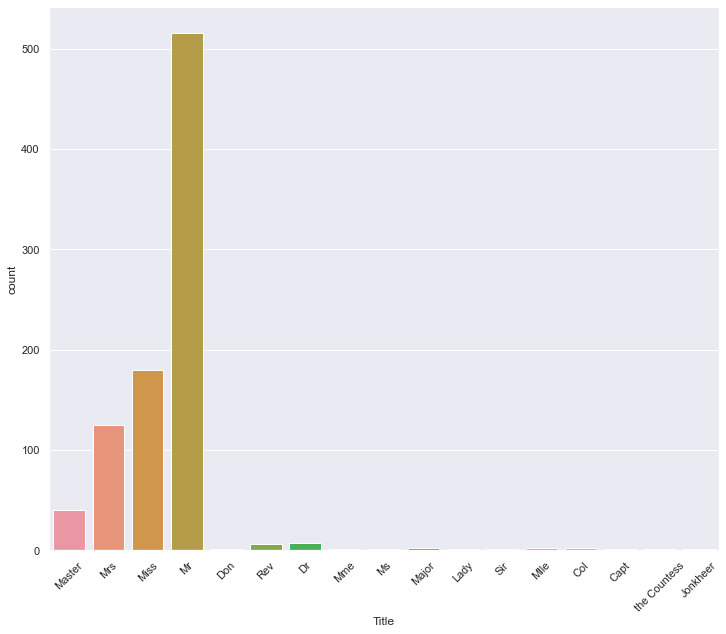

In [64]:
# Let's check the number of these titles
g = sns.countplot(x=raw_data['Title'], data = raw_data)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [65]:
# Categorize these as others in the Title column because they are rare
others = 'Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Lady', 'Capt', 'Mme', 'Don', 'Ms', 'Jonkheer', 'the Countess', 'Sir', 'Dona'

In [66]:
# Replace others as Rare in the Title column
raw_data['Title'] = raw_data['Title'].replace(others, 'Rare')

In [67]:
# Assign these titles to numbers in a dictionary and then replace them as integers in the Title
# column
new_title = {'Mr':0, 'Miss':1, 'Mrs':1, 'Master':2, 'Rare':4}
raw_data['Title'] = raw_data['Title'].map(new_title)
# Do this to make sure all numbers in the Title column are integers
raw_data['Title'] = raw_data['Title'].astype(np.int)

In [68]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Title,Alone
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,S,Child,2,With Family
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,C,Child,1,With Family
2,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,2.815409,S,Child,1,With Family
3,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,2.061048,S,Child,1,Without Family
4,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,3.371597,Q,Child,2,With Family


#### Let's take a look at the Ticket feature

In [69]:
# Extract the ticket prefix otherwise return Z
ticket = []
for i in list(raw_data['Ticket']):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").split(' ')[0])
    else:
        ticket.append('Z')
raw_data['Ticket'] = ticket
raw_data['Ticket'].head(10)

0          Z
1          Z
2         PP
3          Z
4          Z
5          Z
6          Z
7          Z
8    SCParis
9          Z
Name: Ticket, dtype: object

In [70]:
# Dummy all the categorical features
def dummy(data, col):
    return pd.get_dummies(data=data, columns=col)

alone_dummy =dummy(raw_data, ['Alone'])
person_dummy = dummy(raw_data,['Person'])
embark_dummy = dummy(raw_data,['Embarked'])
pclass_dummy = dummy(raw_data, ['Pclass'])
title_dummy = dummy(raw_data, ['Title'])
ticket_dummy = dummy(raw_data, ['Ticket'])

In [71]:
# Grab the respective features
pclass_col= ['Pclass_1', 'Pclass_2', 'Pclass_3']
pclass_dummy = pclass_dummy[pclass_col]
alone_col = ['Alone_With Family', 'Alone_Without Family']
alone_dummy = alone_dummy[alone_col]
person_col = ['Person_Child', 'Person_female', 'Person_male']
person_dummy = person_dummy[person_col]
embark_col = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
embark_dummy = embark_dummy[embark_col]
title_col = ['Title_0', 'Title_1', 'Title_2', 'Title_4']
title_dummy = title_dummy[title_col]
ticket_col = ['Ticket_A4', 'Ticket_A5', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 
              'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 
              'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA4', 'Ticket_SCAH', 
              'Ticket_SCOW', 'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 
              'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO', 
              'Ticket_STONO2', 'Ticket_SWPP', 'Ticket_WC', 'Ticket_WEP', 'Ticket_Z']
ticket_dummy = ticket_dummy[ticket_col]

In [72]:
pclass_dummy.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [73]:
ticket_dummy.head(3)

,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
alone_dummy.head(3)

,Alone_With Family,Alone_Without Family
0,1,0
1,1,0
2,1,0


In [75]:
title_dummy.head(3)

,Title_0,Title_1,Title_2,Title_4
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0


In [76]:
# Change all the feature with continous values to integers
raw_data['Age'] = raw_data['Age'].astype(np.int)
raw_data['Fare'] = raw_data['Fare'].astype(np.int)

In [77]:
# Keep all the data together in a dataframe
data = pd.concat([raw_data,alone_dummy,person_dummy,
                  embark_dummy,pclass_dummy,title_dummy,ticket_dummy], axis=1)

In [78]:
data_cleaned = data.drop(['PassengerId', 'Title', 'Pclass', 'Name', 'Sex', 'SibSp', 
                  'Parch', 'Embarked', 'Ticket', 'Person', 'Alone'], axis=1)
data_cleaned.head()

,Survived,Age,Fare,Alone_With Family,Alone_Without Family,Person_Child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_4,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_Z
0,0,2,3,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,14,3,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,4,2,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,14,2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2,3,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Split the Data for Training

In [79]:
train_data = data_cleaned.drop(['Survived'], axis=1)
train_label = data_cleaned['Survived']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, train_label, random_state=42,
                                                    stratify=train_label, test_size = 0.2)

In [81]:
#make machine learning pipelines in a dictionary
pipelines = {
    'logReg':make_pipeline(StandardScaler(), LogisticRegression()),
    'sgdClas':make_pipeline(StandardScaler(), SGDClassifier()),
    'svc':make_pipeline(StandardScaler(), SVC()),
    'desTreeClas':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'randForestClas':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gradBoostingClas':make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

In [82]:
pipelines.keys()

dict_keys(['logReg', 'sgdClas', 'svc', 'desTreeClas', 'randForestClas', 'gradBoostingClas'])

In [83]:
list(pipelines.values())

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])]

In [84]:
# train/fit each of the model and place them with their respective algorithm and append all in a dictionary/fit_models
fit_models = {}

for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, Y_train)
    #append each model with their respective algorithm to the fit_models
    fit_models[algo]=model

In [85]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('Model Name {}'.format(algo))
    print(classification_report(Y_test, yhat))

Model Name logReg
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.73      0.69      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

Model Name sgdClas
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.69      0.75      0.72        68

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

Model Name svc
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.66      0.70        68

    accuracy                           0.79       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.7

## Random Classifier is our best model with 83% Accuracy

In [86]:
fit_models['randForestClas'].predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)